In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from sklearn.ensemble import RandomForestRegressor
import pickle
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
%matplotlib inline
sns.set()
df = pd.read_csv('heart.csv')
df.dropna()
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.value_counts()

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  caa  thall  output
38   1    2   138     175   0    1        173       0     0.0      2    4    2      1         2
59   1    0   110     239   0    0        142       1     1.2      1    1    3      0         1
          2   126     218   1    1        134       0     2.2      1    1    1      0         1
          1   140     221   0    1        164       1     0.0      2    0    2      1         1
          0   170     326   0    0        140       1     3.4      0    0    3      0         1
                                                                                             ..
51   1    2   94      227   0    1        154       1     0.0      2    1    3      1         1
          0   140     299   0    1        173       1     1.6      2    0    3      0         1
                      298   0    1        122       1     4.2      1    3    3      0         1
                      261   0    0        186

In [6]:
#split data into input and output
X = df.drop('output', axis=1)
y = df['output']
#process the data


0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: output, Length: 303, dtype: int64

In [99]:
#determining the three most important values on output

df.corr()['output'].sort_values()

exng       -0.436757
oldpeak    -0.430696
caa        -0.391724
thall      -0.344029
sex        -0.280937
age        -0.225439
trtbps     -0.144931
chol       -0.085239
fbs        -0.028046
restecg     0.137230
slp         0.345877
thalachh    0.421741
cp          0.433798
output      1.000000
Name: output, dtype: float64

<AxesSubplot:>

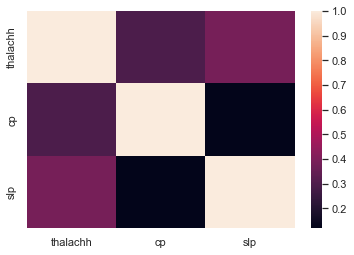

In [50]:
#plotting correlation between most important values
df_corr = pd.DataFrame(df,columns=['thalachh', 'cp', 'slp'])
corr = df_corr.corr()
sns.heatmap(corr)


In [7]:
#applying train test split to data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train.shape



(212, 13)

In [30]:
#building the actual model which is kept small to pevent overfitting
model = tf.keras.Sequential(
    [
        layers.Dense(13, activation="relu"),
        layers.Dense(1, activation="sigmoid"), # As the given data has either 0 or 1, it is binary dataset so we have sigmoid
    ]
)
model.compile(optimizer='adam',
    loss='binary_crossentropy',metrics=['accuracy'])

In [38]:
model.fit(X_train, y_train, epochs=10, validation_data=(X_test,y_test), batch_size=32)


Epoch 1/10
7/7 [==============================] - 0s 11ms/step - loss: 0.4755 - accuracy: 0.8349 - val_loss: 0.5016 - val_accuracy: 0.7912
Epoch 2/10
7/7 [==============================] - 0s 8ms/step - loss: 0.4681 - accuracy: 0.8491 - val_loss: 0.4970 - val_accuracy: 0.7912
Epoch 3/10
7/7 [==============================] - 0s 8ms/step - loss: 0.4612 - accuracy: 0.8538 - val_loss: 0.4925 - val_accuracy: 0.7912
Epoch 4/10
7/7 [==============================] - 0s 7ms/step - loss: 0.4543 - accuracy: 0.8443 - val_loss: 0.4888 - val_accuracy: 0.7912
Epoch 5/10
7/7 [==============================] - 0s 8ms/step - loss: 0.4483 - accuracy: 0.8443 - val_loss: 0.4853 - val_accuracy: 0.7912
Epoch 6/10
7/7 [==============================] - 0s 8ms/step - loss: 0.4429 - accuracy: 0.8491 - val_loss: 0.4825 - val_accuracy: 0.7802
Epoch 7/10
7/7 [==============================] - 0s 6ms/step - loss: 0.4376 - accuracy: 0.8443 - val_loss: 0.4791 - val_accuracy: 0.7912
Epoch 8/10
7/7 [=================

In [51]:
model.evaluate(X_test, y_test, verbose=1)

3/3 [==============================] - 0s 3ms/step - loss: 0.4629 - accuracy: 0.7582


[0.4628617763519287, 0.7582417726516724]

In [52]:
model.evaluate(X_train, y_train, verbose=1)

7/7 [==============================] - 0s 2ms/step - loss: 0.4055 - accuracy: 0.8491


[0.40554216504096985, 0.849056601524353]

In [39]:

hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=100)


Epoch 1/10
3/3 [==============================] - 0s 30ms/step - loss: 0.4201 - accuracy: 0.8491 - val_loss: 0.4698 - val_accuracy: 0.7802
Epoch 2/10
3/3 [==============================] - 0s 14ms/step - loss: 0.4183 - accuracy: 0.8538 - val_loss: 0.4690 - val_accuracy: 0.7692
Epoch 3/10
3/3 [==============================] - 0s 20ms/step - loss: 0.4165 - accuracy: 0.8538 - val_loss: 0.4684 - val_accuracy: 0.7582
Epoch 4/10
3/3 [==============================] - 0s 16ms/step - loss: 0.4151 - accuracy: 0.8491 - val_loss: 0.4677 - val_accuracy: 0.7582
Epoch 5/10
3/3 [==============================] - 0s 15ms/step - loss: 0.4134 - accuracy: 0.8491 - val_loss: 0.4667 - val_accuracy: 0.7582
Epoch 6/10
3/3 [==============================] - 0s 22ms/step - loss: 0.4121 - accuracy: 0.8538 - val_loss: 0.4659 - val_accuracy: 0.7582
Epoch 7/10
3/3 [==============================] - 0s 22ms/step - loss: 0.4108 - accuracy: 0.8538 - val_loss: 0.4650 - val_accuracy: 0.7692
Epoch 8/10
3/3 [===========

In [40]:
test_predictions = model.predict(X_test)
test_predictions = pd.Series(test_predictions.reshape(91,))

In [44]:
from sklearn import metrics
from sklearn.metrics import classification_report
print(metrics.mean_squared_error(y_test,test_predictions))


0.15003122952348244


[]

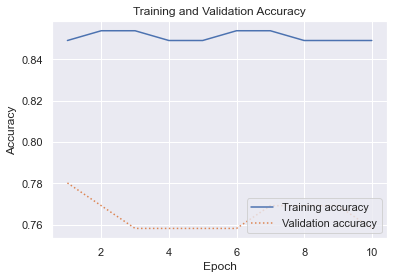

In [45]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val_acc, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()